# Team ID - PNT2022TMID18129

# Importing The Required Libraries

In [1]:
import numpy as np
import tensorflow
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense, Flatten 
from tensorflow.keras.layers import Conv2D
from keras.optimizers import Adam 
from keras. utils import np_utils
import matplotlib.pyplot as plt


# Loading The Data

In [2]:
(x_train, y_train), (x_test, y_test)=mnist.load_data ()

In [3]:
print (x_train.shape)  #shape is used for give the dimens ion values #60000-rows 28x28-pixels
print (x_test.shape)


(60000, 28, 28)
(10000, 28, 28)


# Analyzing The Data

In [4]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

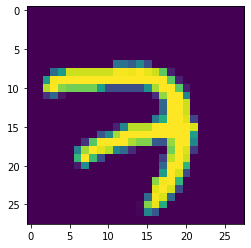

In [5]:
plt.imshow(x_train[5000])

In [6]:
np.argmax(y_train[6000])

0

# Reshaping The Data

In [7]:
x_train=x_train.reshape (60000, 28, 28, 1).astype('float32')
x_test=x_test.reshape (10000, 28, 28, 1).astype ('float32')

In [8]:
number_of_classes = 10

# Applying One Hot Encoding

In [9]:
y_train = np_utils.to_categorical (y_train, number_of_classes)
y_test = np_utils.to_categorical (y_test, number_of_classes)

# MODEL BUILDING

# Add CNN Layers

In [10]:
model=Sequential ()

In [11]:
model.add(Conv2D(64, (3, 3), input_shape=(28, 28, 1), activation='relu'))
model.add(Conv2D(32, (3, 3), activation = 'relu'))


In [12]:
model.add(Flatten())

In [13]:
model.add(Dense(number_of_classes,activation = 'softmax'))

# Compiling The Model

In [14]:
model.compile(loss= 'categorical_crossentropy', optimizer="Adam", metrics=['accuracy'])

In [15]:
x_train = np.asarray(x_train)
y_train = np.asarray(y_train)


# Train The Model

In [16]:
model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=5, batch_size=32)

Epoch 1/5
1875/1875 [==============================] - 71s 36ms/step - loss: 0.2120 - accuracy: 0.9516 - val_loss: 0.1063 - val_accuracy: 0.9700
Epoch 2/5
1875/1875 [==============================] - 70s 37ms/step - loss: 0.0678 - accuracy: 0.9798 - val_loss: 0.1062 - val_accuracy: 0.9716
Epoch 3/5
1875/1875 [==============================] - 73s 39ms/step - loss: 0.0448 - accuracy: 0.9858 - val_loss: 0.0912 - val_accuracy: 0.9752
Epoch 4/5
1875/1875 [==============================] - 74s 40ms/step - loss: 0.0328 - accuracy: 0.9891 - val_loss: 0.0871 - val_accuracy: 0.9811
Epoch 5/5
1875/1875 [==============================] - 75s 40ms/step - loss: 0.0265 - accuracy: 0.9919 - val_loss: 0.1007 - val_accuracy: 0.9774


# Observing The Metrics

In [17]:
metrics = model.evaluate(x_test, y_test, verbose=0)
print("Metrics (Test loss &Test Accuracy) : ")
print(metrics)

Metrics (Test loss &Test Accuracy) : 
[0.10068956017494202, 0.977400004863739]


# Test The Model

In [18]:
prediction=model.predict(x_test[3000:3001])
print(prediction)

1/1 [==============================] - 0s 105ms/step
[[2.00858008e-16 1.58115895e-10 2.06161009e-14 3.52021091e-15
  3.25519334e-10 1.00302845e-04 9.99899745e-01 7.62933130e-23
  7.21222915e-10 1.72238204e-14]]


# Observing The Metrics

In [19]:
metrics=model.evaluate(x_test,y_test,verbose=0)
print("Mertics(Test loss & Test Accuracy):")
print(metrics)

Mertics(Test loss & Test Accuracy):
[0.10068956017494202, 0.977400004863739]


# Test The Model

In [20]:
prediction=model.predict(x_test[3000:3001])
print(prediction)

1/1 [==============================] - 0s 31ms/step
[[2.00858008e-16 1.58115895e-10 2.06161009e-14 3.52021091e-15
  3.25519334e-10 1.00302845e-04 9.99899745e-01 7.62933130e-23
  7.21222915e-10 1.72238204e-14]]


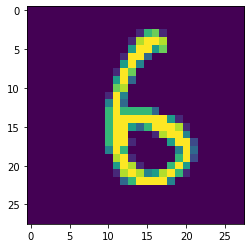

In [21]:
plt.imshow(x_test[3000])

In [22]:
print(np.argmax(prediction, axis=1))

[6]


In [23]:
np.argmax(y_test[3000:3001])

6

# Save The Model

In [24]:
model.save('models/mnistCNN.h5')

# Test with Saved Model

In [25]:
from tensorflow.keras.models import load_model
from PIL import Image 
import numpy as np

In [26]:
model = load_model(r'C:\Users\VINUPPRIYA\models\mnistCNN.h5')

In [27]:
img = Image.open(r'C:\Users\VINUPPRIYA\OneDrive\Desktop\mnist-dataset-5.png').convert("L")
img = img.resize( (28, 28) )
im2arr = np.array(img)
im2arr = im2arr.reshape(1, 28, 28, 1)

In [28]:
img

In [29]:
y_pred = model.predict(im2arr)
print(y_pred)

1/1 [==============================] - 0s 63ms/step
[[1.4043201e-16 2.0986982e-16 5.1506965e-18 3.4691118e-11 2.5623115e-16
  1.0000000e+00 4.1465134e-15 8.2354650e-19 1.2626800e-11 5.0632276e-10]]


In [30]:
import numpy as np
print(np.argmax(y_pred, axis=1))

[5]
